In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
titles_df = pd.read_csv("titles.csv")
titles_df.drop(columns = ['id','description','seasons','imdb_id'], inplace = True)
titles_df['genres'] = titles_df['genres'].apply(ast.literal_eval)
titles_df['production_countries'] = titles_df['production_countries'].apply(ast.literal_eval)
titles_df['primary_genre'] = titles_df['genres'].apply(lambda x: x[0] if x else 'Unknown')
titles_df['primary_country'] = titles_df['production_countries'].apply(lambda x: x[0] if x else 'Unknown')
country_name_to_iso = {'Lebanon': 'LB'}
titles_df['primary_country'] = titles_df['primary_country'].replace(country_name_to_iso)
titles_df.reset_index(drop=True, inplace=True)
titles_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,[documentation],[US],NaN,NaN,0.600,NaN,documentation,US
1,Taxi Driver,MOVIE,1976,R,114,"[drama, crime]",[US],8.2,808582.0,40.965,8.179,drama,US
2,Deliverance,MOVIE,1972,R,109,"[drama, action, thriller, european]",[US],7.7,107673.0,10.010,7.300,drama,US
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[fantasy, action, comedy]",[GB],8.2,534486.0,15.461,7.811,fantasy,GB
4,The Dirty Dozen,MOVIE,1967,NaN,150,"[war, action]","[GB, US]",7.7,72662.0,20.398,7.600,war,GB


In [3]:
countries_df = pd.read_csv("countries.csv")
countries_df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [4]:
titles_df = titles_df.merge(countries_df[['country', 'latitude', 'longitude']], left_on='primary_country', right_on='country', how='left')
titles_df.drop('country', axis=1, inplace=True)
titles_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,latitude,longitude
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,[documentation],[US],NaN,NaN,0.600,NaN,documentation,US,37.090240,-95.712891
1,Taxi Driver,MOVIE,1976,R,114,"[drama, crime]",[US],8.2,808582.0,40.965,8.179,drama,US,37.090240,-95.712891
2,Deliverance,MOVIE,1972,R,109,"[drama, action, thriller, european]",[US],7.7,107673.0,10.010,7.300,drama,US,37.090240,-95.712891
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[fantasy, action, comedy]",[GB],8.2,534486.0,15.461,7.811,fantasy,GB,55.378051,-3.435973
4,The Dirty Dozen,MOVIE,1967,NaN,150,"[war, action]","[GB, US]",7.7,72662.0,20.398,7.600,war,GB,55.378051,-3.435973


In [5]:
filtered_genres = ['drama', 'thriller', 'comedy', 'action', 'fantasy', 'scifi']
titles_df_filtered = titles_df[titles_df['primary_genre'].isin(filtered_genres)]

titles_df_filtered.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,latitude,longitude
1,Taxi Driver,MOVIE,1976,R,114,"[drama, crime]",[US],8.2,808582.0,40.965,8.179,drama,US,37.090240,-95.712891
2,Deliverance,MOVIE,1972,R,109,"[drama, action, thriller, european]",[US],7.7,107673.0,10.010,7.300,drama,US,37.090240,-95.712891
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[fantasy, action, comedy]",[GB],8.2,534486.0,15.461,7.811,fantasy,GB,55.378051,-3.435973
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"[comedy, european]",[GB],8.8,73424.0,17.617,8.306,comedy,GB,55.378051,-3.435973
6,Life of Brian,MOVIE,1979,R,94,[comedy],[GB],8.0,395024.0,17.770,7.800,comedy,GB,55.378051,-3.435973


In [6]:

titles_df_filtered_cleaned = titles_df_filtered[(titles_df_filtered['primary_country'] != 'Unknown') & (titles_df_filtered['primary_country'] != 'XX')]


country_to_continent = {
    'US': 'North America', 'GB': 'Europe', 'EG': 'Africa', 'IN': 'Asia', 'SU': 'Europe',  
    'LB': 'Asia', 'AR': 'South America', 'JP': 'Asia', 'FR': 'Europe', 'DE': 'Europe',
    'IT': 'Europe', 'CA': 'North America', 'IE': 'Europe', 'HK': 'Asia', 'AU': 'Oceania',
    'MX': 'North America', 'ES': 'Europe', 'CO': 'South America', 'PS': 'Asia', 'BE': 'Europe',
    'TR': 'Asia', 'DK': 'Europe', 'MT': 'Europe', 'KR': 'Asia', 'CN': 'Asia',
    'CL': 'South America', 'CZ': 'Europe', 'TW': 'Asia', 'SG': 'Asia', 'MY': 'Asia',
    'NG': 'Africa', 'ZA': 'Africa', 'PH': 'Asia', 'AE': 'Asia', 'HU': 'Europe',
    'NO': 'Europe', 'SA': 'Asia', 'ID': 'Asia', 'FI': 'Europe', 'IL': 'Asia',
    'AT': 'Europe', 'RU': 'Europe', 'VE': 'South America', 'BR': 'South America', 'RO': 'Europe',
    'NZ': 'Oceania', 'UA': 'Europe', 'CH': 'Europe', 'GH': 'Africa', 'BG': 'Europe',
    'IS': 'Europe', 'SE': 'Europe', 'NL': 'Europe', 'HR': 'Europe', 'TN': 'Africa',
    'GL': 'North America',  
    'PT': 'Europe', 'QA': 'Asia', 'PK': 'Asia', 'VN': 'Asia', 'TH': 'Asia',
    'IR': 'Asia', 'GE': 'Asia', 'PL': 'Europe', 'PR': 'North America', 'PE': 'South America',
    'KH': 'Asia', 'RS': 'Europe', 'TZ': 'Africa', 'NP': 'Asia', 'BD': 'Asia',
    'KG': 'Asia', 'KW': 'Asia', 'BT': 'Asia', 'JO': 'Asia', 'IO': 'Asia',  
    'SN': 'Africa', 'MA': 'Africa', 'CM': 'Africa', 'AF': 'Asia', 'UY': 'South America',
    'NA': 'Africa', 'GR': 'Europe', 'KE': 'Africa'
}


titles_df_filtered_cleaned['continent'] = titles_df_filtered_cleaned['primary_country'].map(country_to_continent)


unique_continents = titles_df_filtered_cleaned['continent'].unique()


avg_imdb_scores_by_continent = titles_df_filtered_cleaned.groupby(['release_year', 'primary_genre', 'continent'])['imdb_score'].mean().reset_index()


unique_continents, avg_imdb_scores_by_continent.head()


/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_8402/1414958029.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df_filtered_cleaned['continent'] = titles_df_filtered_cleaned['primary_country'].map(country_to_continent)


(array(['North America', 'Europe', 'Africa', 'Asia', 'South America',
        'Oceania'], dtype=object),
    release_year primary_genre continent  imdb_score
 0          1956        action    Africa         6.7
 1          1958         drama    Africa         7.5
 2          1960         drama      Asia         6.4
 3          1961        action    Europe         7.5
 4          1963        action    Africa         7.6)

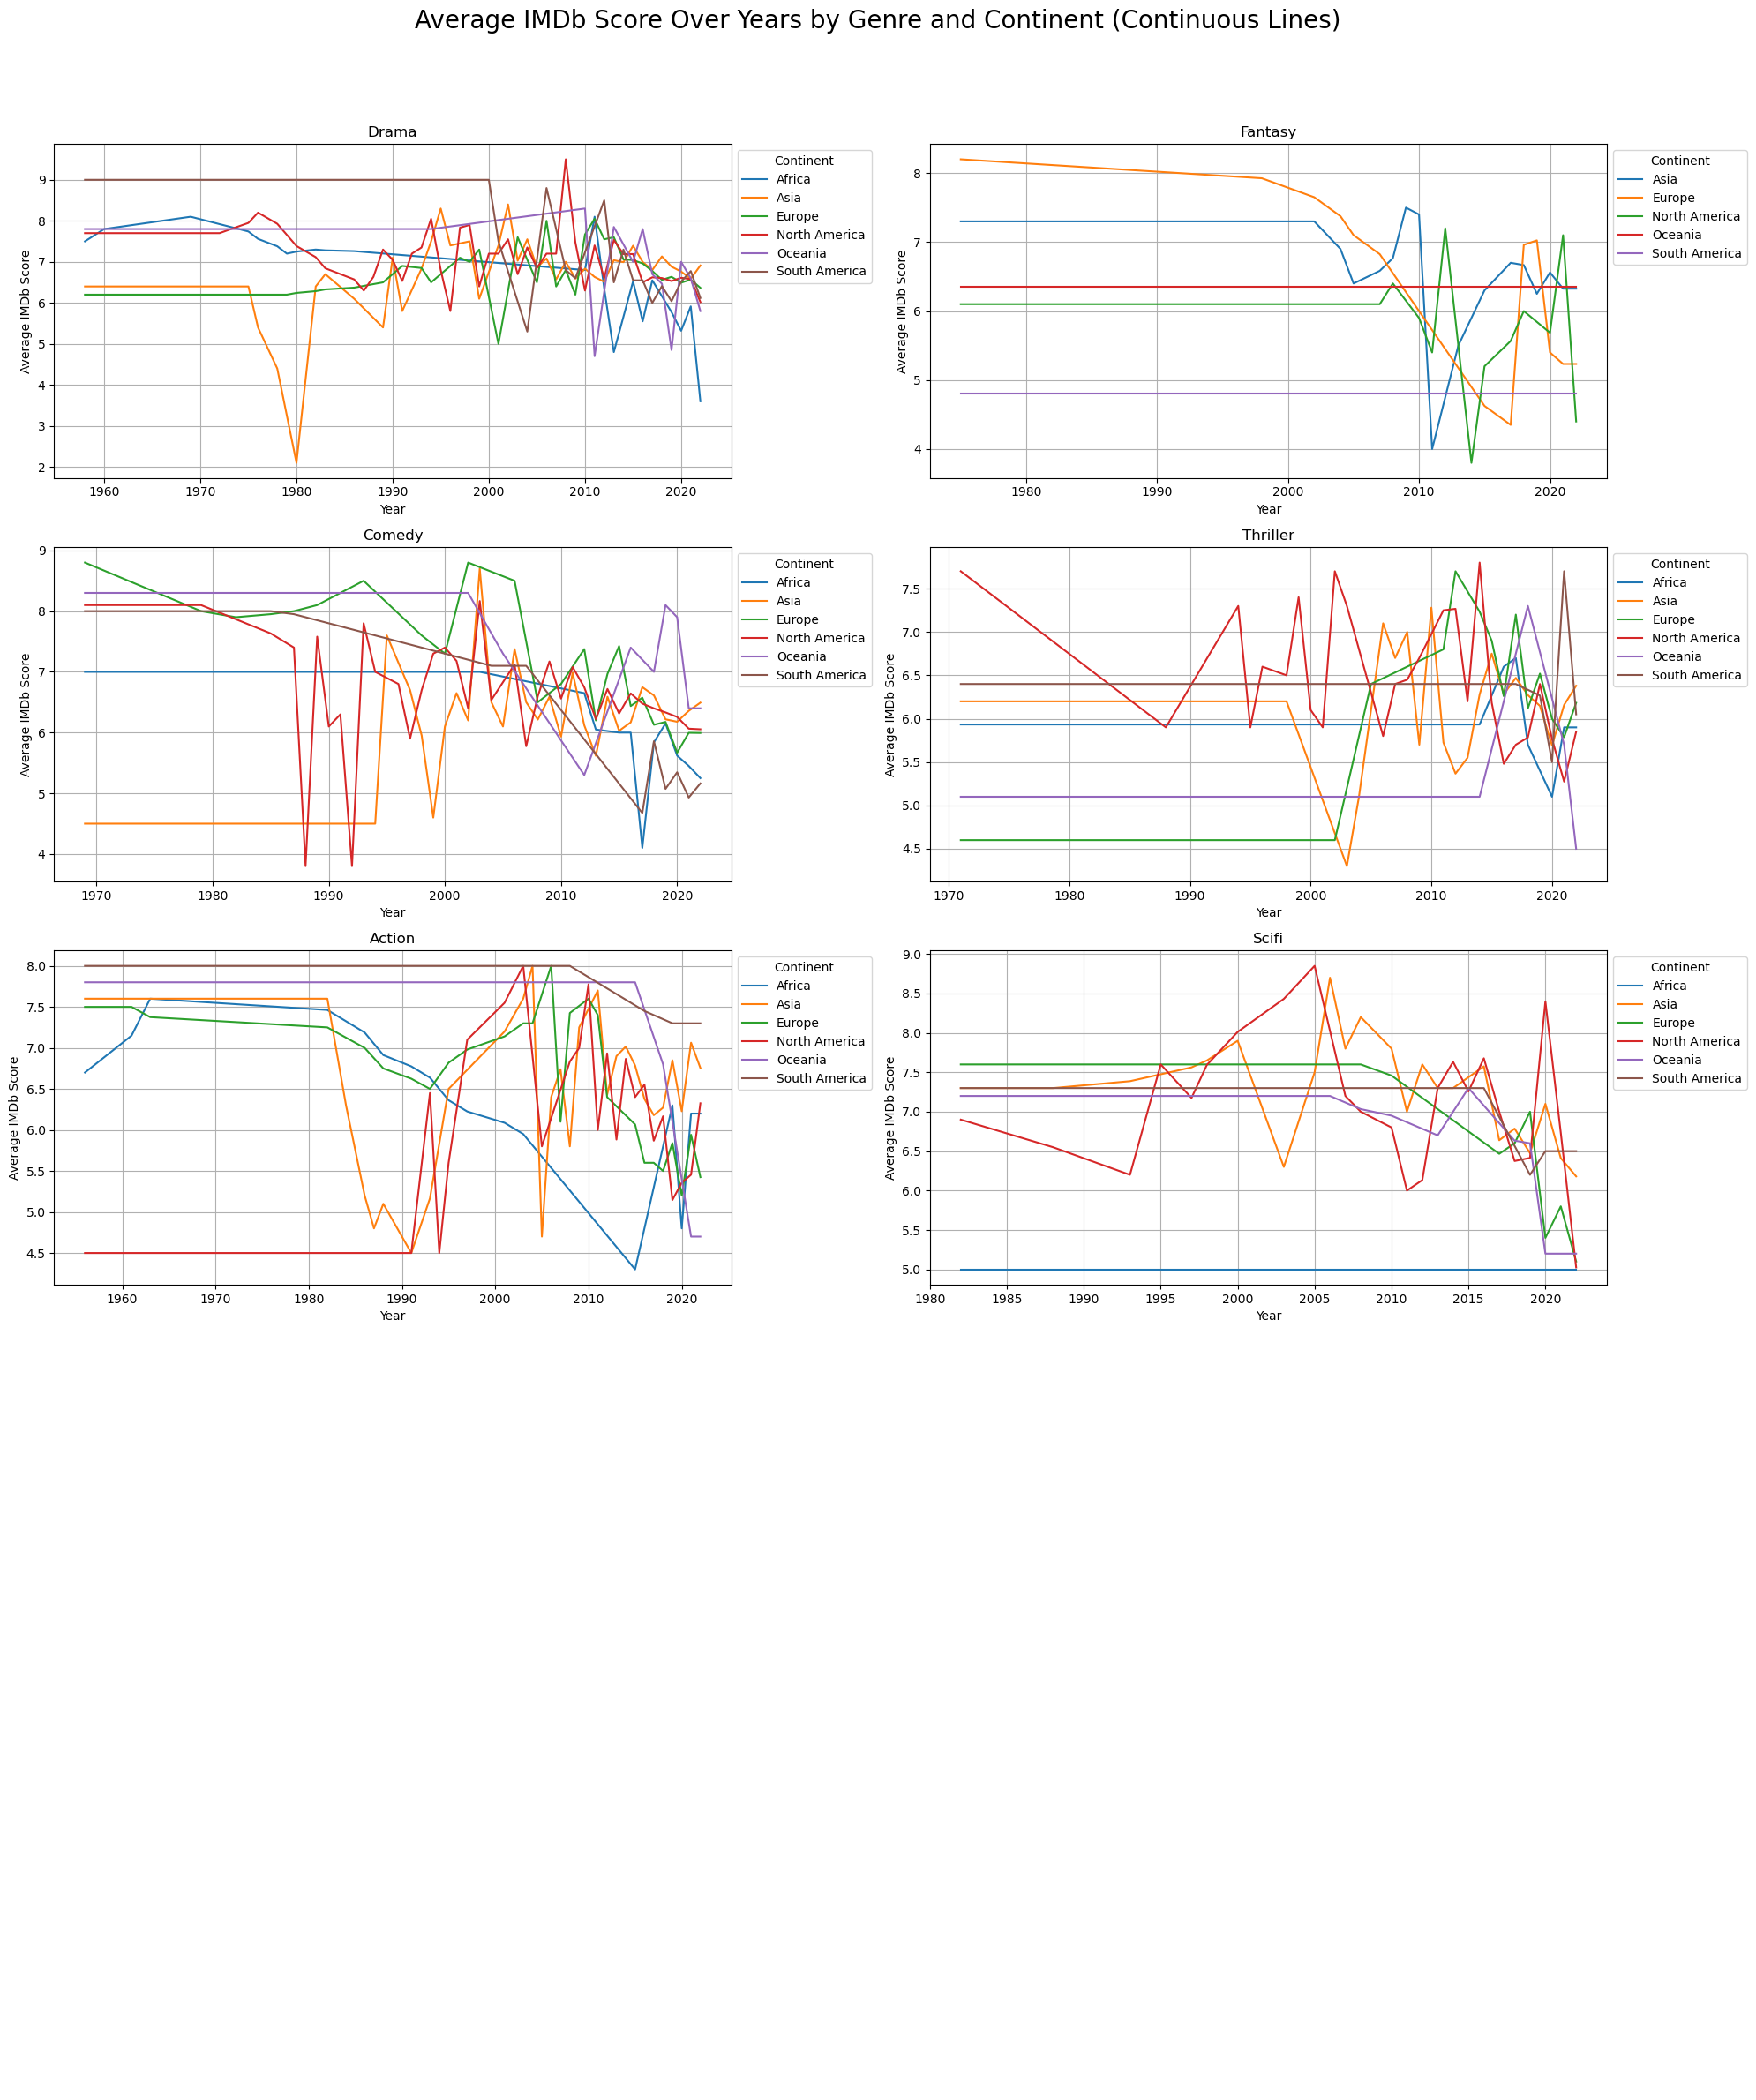

In [10]:

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25), squeeze=False)  
fig.suptitle('Average IMDb Score Over Years by Genre and Continent (Continuous Lines)', fontsize=20)


axes_flat = axes.flatten()

for i, genre in enumerate(unique_genres):
    if i >= len(axes_flat):
        break  
    genre_data = avg_imdb_scores_by_continent[avg_imdb_scores_by_continent['primary_genre'] == genre]
    
    
    pivot_data = genre_data.pivot_table(index='release_year', columns='continent', values='imdb_score')
    
    
    interpolated_data = pivot_data.interpolate(method='linear', limit_direction='both', axis=0)
    
    
    interpolated_data.plot(ax=axes_flat[i], title=genre.capitalize())
    axes_flat[i].set_xlabel('Year')
    axes_flat[i].set_ylabel('Average IMDb Score')
    axes_flat[i].legend(title='Continent', bbox_to_anchor=(1, 1))
    axes_flat[i].grid(True)


for j in range(i + 1, len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import os


animation_dir = "continent_animations_line"
os.makedirs(animation_dir, exist_ok=True)


continents = avg_imdb_scores_by_continent['continent'].unique()


for continent in continents:
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(f'IMDb Score Trends by Genre Over Years - {continent}')
    plt.xlabel('Year')
    plt.ylabel('Average IMDb Score')
    
    
    min_year = avg_imdb_scores_by_continent['release_year'].min()
    max_year = avg_imdb_scores_by_continent['release_year'].max()
    ax.set_xlim(min_year, max_year)
    ax.set_ylim(0, 10)  
    ax.grid(True)

    lines = {}  
    for genre in unique_genres:
        
        lines[genre], = ax.plot([], [], label=genre)

    def update(year):
        for genre in unique_genres:
            genre_data = avg_imdb_scores_by_continent[(avg_imdb_scores_by_continent['primary_genre'] == genre) & (avg_imdb_scores_by_continent['continent'] == continent)]
            if genre_data.empty:
                continue
            pivot_data = genre_data.pivot_table(index='release_year', columns='primary_genre', values='imdb_score')
            interpolated_data = pivot_data.interpolate(method='linear', limit_direction='both', axis=0)
            data = interpolated_data.loc[:year]  
            
            
            if not data.empty:
                lines[genre].set_data(data.index, data[genre])

        ax.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
        return lines.values()

    
    years_range = np.arange(avg_imdb_scores_by_continent[avg_imdb_scores_by_continent['continent'] == continent]['release_year'].min(),
                            avg_imdb_scores_by_continent[avg_imdb_scores_by_continent['continent'] == continent]['release_year'].max() + 1)

    ani = FuncAnimation(fig, update, frames=years_range, blit=True, repeat=False)

    
    animation_path = os.path.join(animation_dir, f'{continent.lower().replace(" ", "_")}_imdb_scores.mp4')
    ani.save(animation_path, writer=FFMpegWriter(fps=2))
    
    plt.close()  

    print(f"Animation for {continent} saved as {animation_path}.")


Animation for Africa saved as continent_animations_line/africa_imdb_scores.mp4.
Animation for Asia saved as continent_animations_line/asia_imdb_scores.mp4.
Animation for Europe saved as continent_animations_line/europe_imdb_scores.mp4.
Animation for North America saved as continent_animations_line/north_america_imdb_scores.mp4.
Animation for South America saved as continent_animations_line/south_america_imdb_scores.mp4.
Animation for Oceania saved as continent_animations_line/oceania_imdb_scores.mp4.


In [15]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import os


avg_imdb_scores_by_continent = avg_imdb_scores_by_continent[avg_imdb_scores_by_continent['release_year'] >= 2000]


animation_dir = "continent_animations_line"
os.makedirs(animation_dir, exist_ok=True)


continents = avg_imdb_scores_by_continent['continent'].unique()


for continent in continents:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    min_year = 2000
    max_year = avg_imdb_scores_by_continent['release_year'].max()
    plt.title(f'IMDb Score Trends by Genre Over Years - {continent} ({min_year}-{max_year})')
    plt.xlabel('Year')
    plt.ylabel('Average IMDb Score')

    
    ax.set_xlim(min_year, max_year)
    ax.set_ylim(0, 10)  
    ax.set_xticks(np.arange(min_year, max_year + 1, 1))  
    ax.grid(True)

    lines = {}  
    for genre in unique_genres:
        
        lines[genre], = ax.plot([], [], label=genre)

    def update(year):
        for genre in unique_genres:
            genre_data = avg_imdb_scores_by_continent[(avg_imdb_scores_by_continent['primary_genre'] == genre) & (avg_imdb_scores_by_continent['continent'] == continent)]
            if genre_data.empty:
                continue
            pivot_data = genre_data.pivot_table(index='release_year', columns='primary_genre', values='imdb_score')
            interpolated_data = pivot_data.interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill')
            data = interpolated_data.loc[:year] 
            
            
            if not data.empty:
                lines[genre].set_data(data.index, data[genre])

        ax.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
        
        ax.set_xticklabels(ax.get_xticks(), rotation=30)  
        return lines.values()

    
    years_range = np.arange(min_year, max_year + 1)

    ani = FuncAnimation(fig, update, frames=years_range, blit=True, repeat=False)

    
    animation_path = os.path.join(animation_dir, f'{continent.lower().replace(" ", "_")}_imdb_scores.mp4')
    ani.save(animation_path, writer=FFMpegWriter(fps=4))  
    plt.close()  

    print(f"Animation for {continent} saved as {animation_path}.")


Animation for Asia saved as continent_animations_line/asia_imdb_scores.mp4.
Animation for Europe saved as continent_animations_line/europe_imdb_scores.mp4.
Animation for North America saved as continent_animations_line/north_america_imdb_scores.mp4.
Animation for South America saved as continent_animations_line/south_america_imdb_scores.mp4.
Animation for Oceania saved as continent_animations_line/oceania_imdb_scores.mp4.
Animation for Africa saved as continent_animations_line/africa_imdb_scores.mp4.


In [22]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter  
import pandas as pd
import numpy as np


avg_imdb_scores_by_continent = avg_imdb_scores_by_continent[avg_imdb_scores_by_continent['release_year'] >= 2002]


continents = avg_imdb_scores_by_continent['continent'].unique()
genres = avg_imdb_scores_by_continent['primary_genre'].unique()


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15), squeeze=False)
fig.suptitle('Average IMDb Score Over Years by Continent for Different Genres (2002 Onwards)', fontsize=20)


axes_flat = axes.flatten()


years_range = np.arange(2002, avg_imdb_scores_by_continent['release_year'].max() + 1)

def update(year):
    for ax in axes_flat:
        ax.clear()
    
    for i, continent in enumerate(continents):
        if i >= len(axes_flat):
            break  
        ax = axes_flat[i]
        continent_data = avg_imdb_scores_by_continent[(avg_imdb_scores_by_continent['continent'] == continent) & (avg_imdb_scores_by_continent['release_year'] <= year)]
        if continent_data.empty:
            continue 
        
        pivot_data = continent_data.pivot_table(index='release_year', columns='primary_genre', values='imdb_score', aggfunc='mean')
        interpolated_data = pivot_data.interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill')
        
       
        if not interpolated_data.empty and interpolated_data.notna().any().any():
            interpolated_data.plot(kind='area', ax=ax, alpha=0.5, stacked=False)
            ax.set_title(continent)
            ax.set_xlim(2002, years_range.max())
            ax.set_ylim(4, 10) 
            ax.set_xticks(np.arange(2002, 2022, 1))
            ax.set_xlabel('Year')
            ax.set_ylabel('Average IMDb Score')
            ax.legend(title='Genre', bbox_to_anchor=(1, 1))
        else:
            ax.set_title(continent)
            ax.set_xlim(2002, years_range.max())  
            ax.set_ylim(4, 10)  
            ax.set_xticks(np.arange(2002, 2023, 1))
            ax.set_xlabel('Year')
            ax.set_ylabel('Average IMDb Score')
            ax.legend(title='Genre', bbox_to_anchor=(1, 1))
            
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


ani = FuncAnimation(fig, update, frames=years_range, repeat=False)


ani.save('imdb_scores_animation_2002_onwards.mp4', writer='ffmpeg', fps=1)

plt.close() 



/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_15790/1607737900.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_15790/1607737900.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_15790/1607737900.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_15790/1607737900.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_15790/1607737900.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_15790/1607737900.py:61: UserWarning: The figur

Animation saved as imdb_scores_animation_2000_onwards.mp4


In [23]:
import os

save_dir = "continent_animations"
os.makedirs(save_dir, exist_ok=True)


In [24]:
from matplotlib.animation import FFMpegWriter


def create_continent_animation(continent):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f'Average IMDb Score Over Years for {continent} (2002 Onwards)', fontsize=15)

    def update_continent(year):
        ax.clear()  
        ax.set_xlim(2002, years_range.max())
        ax.set_ylim(4, 10)
        ax.set_xticks(np.arange(2002, years_range.max() + 1, 2))  
        ax.set_xlabel('Year')
        ax.set_ylabel('Average IMDb Score')

        continent_data = avg_imdb_scores_by_continent[(avg_imdb_scores_by_continent['continent'] == continent) & (avg_imdb_scores_by_continent['release_year'] <= year)]
        if not continent_data.empty:
            pivot_data = continent_data.pivot_table(index='release_year', columns='primary_genre', values='imdb_score', aggfunc='mean')
            interpolated_data = pivot_data.interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill')
            if interpolated_data.notna().any().any():
                interpolated_data.plot(kind='area', ax=ax, alpha=0.5, stacked=False)
                ax.legend(title='Genre', bbox_to_anchor=(1, 1))
            else:
                ax.text(0.5, 0.5, 'No Data Available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        else:
            ax.text(0.5, 0.5, 'No Data Available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

   
    ani = FuncAnimation(fig, update_continent, frames=years_range, repeat=False)

    
    animation_filename = os.path.join(save_dir, f'imdb_scores_{continent.lower().replace(" ", "_")}_2002_onwards.mp4')
    ani.save(animation_filename, writer=FFMpegWriter(fps=1))

    plt.close(fig)  


for continent in continents:
    create_continent_animation(continent)
    print(f"Animation for {continent} saved.")


Animation for Asia saved.
Animation for Europe saved.
Animation for North America saved.
Animation for Oceania saved.
Animation for Africa saved.
Animation for South America saved.
